In [11]:
%matplotlib notebook

In [12]:
# dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import scipy.stats as st
from scipy.stats import linregress


In [13]:
# import csv
rough = "Resources/suicide_rates.csv"
rough_data_df = pd.read_csv(rough)

In [14]:
# drop unnecessary columns
rough_df = rough_data_df.drop(columns=["HDI for year", "country-year", "generation", "gdp_per_capita ($)", "suicides_no", "population"])

# drop rows with missing values
rough_df.dropna(how='any')

# clean up age range fill
rough_df['age'] = rough_df['age'].replace({'35-54 years': '35-54', '25-34 years': '25-34', '55-74 years': '55-74', '75+ years': '75+', '15-24 years': '15-24', '5-14 years': '05-14'})

# rename columns
renamed_df = rough_df.rename(columns={"country":"Country", "year":"Year", "sex":"Sex", "age":"Age Range", "suicides/100k pop":"Suicides/100k pop", " gdp_for_year ($) ":"GDP(Year)"})

# filter for years 2000-2010
after_start_date = renamed_df["Year"] >= 2000
before_end_date = renamed_df["Year"] <= 2010
between_two_dates = after_start_date & before_end_date
filtered_date = renamed_df.loc[between_two_dates]

filtered_date_df = pd.DataFrame(filtered_date)

# Convert data type for GDP calculations 
filtered_date_df["GDP(Year)"] = filtered_date_df["GDP(Year)"].str.replace(',','').astype(int)

# Filter down countries to the Americas
target_countries= filtered_date_df.loc[(filtered_date_df['Country']== "United States")|  (filtered_date_df["Country"]== "Canada") | (filtered_date_df["Country"]== "Mexico") | (filtered_date_df["Country"]== "Antigua and Barbuda")|(filtered_date_df["Country"]== "Argentina")|(filtered_date_df["Country"]== "Bahamas")| (filtered_date_df["Country"]== "Barbados")|(filtered_date_df["Country"]== "Belize")|(filtered_date_df["Country"]== "Brazil")| (filtered_date_df["Country"]== "Chile")|(filtered_date_df["Country"]== "Colombia")|(filtered_date_df["Country"]== "Costa Rica")|(filtered_date_df["Country"]== "Cuba")| (filtered_date_df["Country"]== "Ecuador")|  (filtered_date_df["Country"]== "El Salvador")| (filtered_date_df["Country"]== "Grenada")| (filtered_date_df["Country"]== "Guatemala")| (filtered_date_df["Country"]== "Jamaica")|(filtered_date_df["Country"]== "Nicaragua")| (filtered_date_df["Country"]== "Panama")| (filtered_date_df["Country"]== "Paraguay")| (filtered_date_df["Country"]== "Puerto Rico")| (filtered_date_df["Country"]== "Saint Lucia")| (filtered_date_df["Country"]== "Saint Vincent and Grenadines")| (filtered_date_df["Country"]== "Suriname")| (filtered_date_df["Country"]== "Trinidad and Tobago")| (filtered_date_df["Country"] == "Uruguay"), :]

target_countries_df= pd.DataFrame(target_countries)

# Display table
target_countries_df.head()

,Country,Year,Sex,Age Range,Suicides/100k pop,GDP(Year)
420,Antigua and Barbuda,2000,male,55-74,30.00,830158778
421,Antigua and Barbuda,2000,male,35-54,9.97,830158778
422,Antigua and Barbuda,2000,female,15-24,0.00,830158778
423,Antigua and Barbuda,2000,female,25-34,0.00,830158778
424,Antigua and Barbuda,2000,female,35-54,0.00,830158778


In [15]:
# group by year and find GDP/Suicide rate means
country_gdp = target_countries_df.groupby(["Year"])["GDP(Year)"].mean()
country_suicide = target_countries_df.groupby(["Year"])['Suicides/100k pop'].mean()

# create summary table
country_summary_df = pd.DataFrame({"GDP Mean": country_gdp, "Suicide Rate Mean": country_suicide})

# format numbers
country_summary_df["GDP Mean"] = country_summary_df["GDP Mean"].map("${:,.2f}".format)
country_summary_df["Suicide Rate Mean"] = country_summary_df["Suicide Rate Mean"].map("{:,.2f}".format)

# reset index
country_summary_reset_df = country_summary_df.reset_index()

# display table
country_summary_reset_df


,Year,GDP Mean,Suicide Rate Mean
0,2000,"$523,374,607,282.52",8.98
1,2001,"$513,809,673,988.31",8.54
2,2002,"$520,495,832,680.35",8.74
3,2003,"$548,243,561,816.38",8.40
4,2004,"$593,083,518,206.50",8.08
5,2005,"$646,919,427,125.58",7.96
6,2006,"$698,477,655,388.73",7.92
7,2007,"$810,007,720,653.08",8.75
8,2008,"$811,550,167,667.20",8.41
9,2009,"$751,250,437,554.73",8.12


<IPython.core.display.Javascript object>


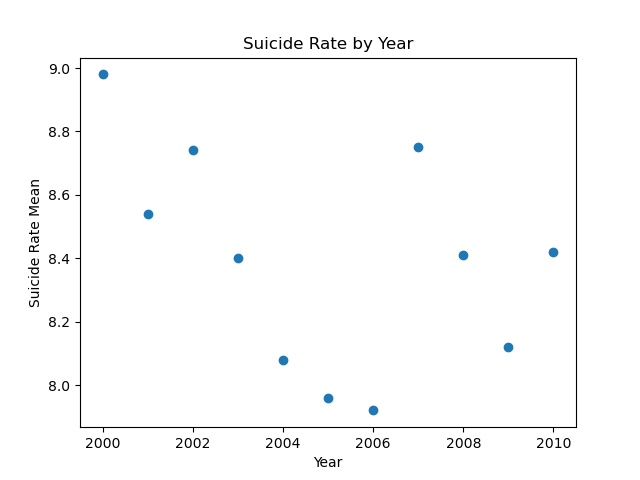

In [35]:
# define data for chart
years = country_summary_reset_df['Year']
suicide_rate= country_summary_reset_df['Suicide Rate Mean']

sui = []

for rate in suicide_rate:
    rate = float(rate) 
    sui.append(rate)

# create figure
scatter= plt.figure()
plt.scatter(years, sui)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Suicide Rate Mean")
plt.title("Suicide Rate by Year")

# Display plot
plt.show()

The correlation between the suicide rate in the Americas is -0.43.


<IPython.core.display.Javascript object>


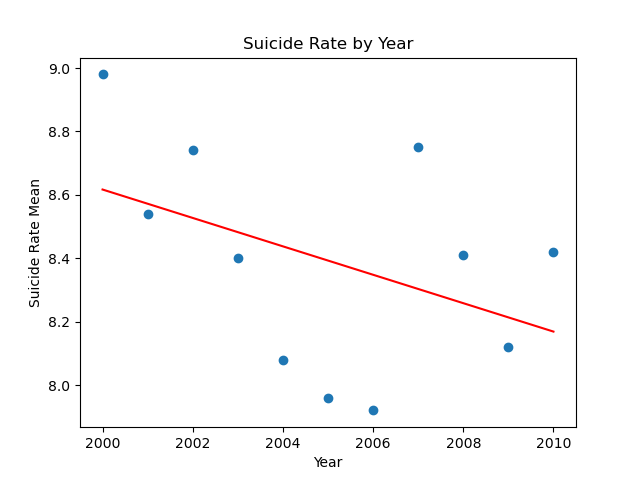

y = -0.04x + 98.25


In [37]:
# define data for chart
years = country_summary_reset_df['Year']
suicide_rate= country_summary_reset_df['Suicide Rate Mean']
sui = []

for rate in suicide_rate:
    rate = float(rate) 
    sui.append(rate)

# find correlation    
correlation = st.pearsonr(years, sui)
print(f"The correlation between the suicide rate in the Americas is {round(correlation[0],2)}.")

# create figure
plot= plt.figure()
plt.scatter(years, sui)

# find and plot regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(years, sui)
regress_values = years * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(years, regress_values, 'r-')

# label chart
plt.annotate(line_eq,(0, 10), fontsize=15, color='red')
plt.xlabel("Year")
plt.ylabel("Suicide Rate Mean")
plt.title("Suicide Rate by Year")

# print line eq.
print(line_eq)

# display chart
plt.show()

<IPython.core.display.Javascript object>


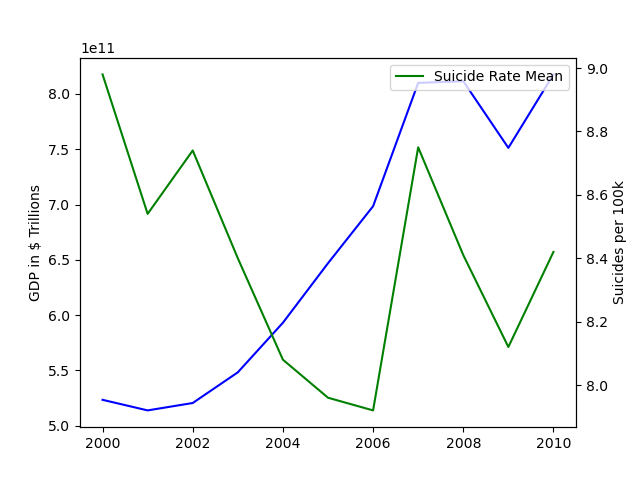

In [16]:
# define data 
years = country_summary_reset_df['Year']
gdp_mean= country_summary_reset_df['GDP Mean']
suicide_rate= country_summary_reset_df['Suicide Rate Mean']

# change and format datatypes 
sui = []
gdpr = []
for rate in suicide_rate:
    rate = float(rate) 
    sui.append(rate)
for gdp in gdp_mean:
    gdp = gdp.replace(",", "")
    gdp = float(gdp[1:]) 
    gdpr.append(gdp)
    
# create plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the gdp mean
gdp = ax1.plot(years, gdpr , color="blue", label='GDP Mean')

# plot the suicide rate mean
suicide_rate = ax2.plot(years, sui, color="green", label= 'Suicide Rate Mean')

# create labels and legend 
ax1.set_ylabel('GDP in $ Trillions')
ax2.set_ylabel('Suicides per 100k')
plt.legend()

#display chart
plt.show()



In [17]:
# groub by years and ages / find gdp and suicide rate mean
age_gdp = target_countries_df.groupby(["Age Range", "Year"])["GDP(Year)"].mean()
age_suicide = target_countries_df.groupby(["Age Range", "Year"])['Suicides/100k pop'].mean()

# create summary table
age_summary_df = pd.DataFrame({"GDP Mean": age_gdp, "Suicide Rate Mean": age_suicide})

# format numbers
age_summary_df["GDP Mean"] = age_summary_df["GDP Mean"].map("${:,.2f}".format)
age_summary_df["Suicide Rate Mean"] = age_summary_df["Suicide Rate Mean"].map("{:,.2f}".format)

# reset index
age_summary_reset_df = age_summary_df.reset_index()

# display table
age_summary_reset_df

,Age Range,Year,GDP Mean,Suicide Rate Mean
0,05-14,2000,"$523,374,607,282.52",0.55
1,05-14,2001,"$513,809,673,988.31",0.50
2,05-14,2002,"$520,495,832,680.35",0.67
3,05-14,2003,"$548,243,561,816.38",0.54
4,05-14,2004,"$593,083,518,206.50",0.63
...,...,...,...,...
61,75+,2006,"$698,477,655,388.73",13.20
62,75+,2007,"$810,007,720,653.08",14.03
63,75+,2008,"$811,550,167,667.20",13.19
64,75+,2009,"$751,250,437,554.73",12.01


In [21]:
# print data for chart
summary_group1 = age_summary_reset_df.loc[(age_summary_reset_df["Age Range"] == "05-14")]
summary_group2 = age_summary_reset_df.loc[(age_summary_reset_df["Age Range"] == "15-24")]
summary_group3 = age_summary_reset_df.loc[(age_summary_reset_df["Age Range"] == "25-34")]
summary_group4 = age_summary_reset_df.loc[(age_summary_reset_df["Age Range"] == "35-54")]
summary_group5 = age_summary_reset_df.loc[(age_summary_reset_df["Age Range"] == "55-74")]
summary_group6 = age_summary_reset_df.loc[(age_summary_reset_df["Age Range"] == "75+")]

print(summary_group1["Suicide Rate Mean"])
print(summary_group2["Suicide Rate Mean"])
print(summary_group3["Suicide Rate Mean"])
print(summary_group4["Suicide Rate Mean"])
print(summary_group5["Suicide Rate Mean"])
print(summary_group6["Suicide Rate Mean"])

0     0.55
1     0.50
2     0.67
3     0.54
4     0.63
5     0.80
6     0.65
7     0.83
8     0.71
9     0.58
10    0.91
Name: Suicide Rate Mean, dtype: object
11    7.65
12    7.16
13    7.50
14    7.21
15    7.08
16    7.77
17    7.57
18    8.02
19    7.97
20    8.12
21    7.55
Name: Suicide Rate Mean, dtype: object
22     9.47
23     9.46
24     8.21
25     8.73
26     8.48
27     8.85
28     7.81
29    10.47
30     8.45
31     9.10
32     9.66
Name: Suicide Rate Mean, dtype: object
33    10.27
34     9.13
35     9.18
36     8.77
37     9.33
38     8.49
39     9.38
40     9.79
41    10.28
42     9.44
43     9.37
Name: Suicide Rate Mean, dtype: object
44    10.77
45    10.15
46     9.41
47    11.33
48    11.12
49     8.99
50     8.94
51     9.38
52     9.86
53     9.50
54     9.07
Name: Suicide Rate Mean, dtype: object
55    15.17
56    14.85
57    17.47
58    13.81
59    11.87
60    12.90
61    13.20
62    14.03
63    13.19
64    12.01
65    13.95
Name: Suicide Rate Mean, dtype: obj

<IPython.core.display.Javascript object>


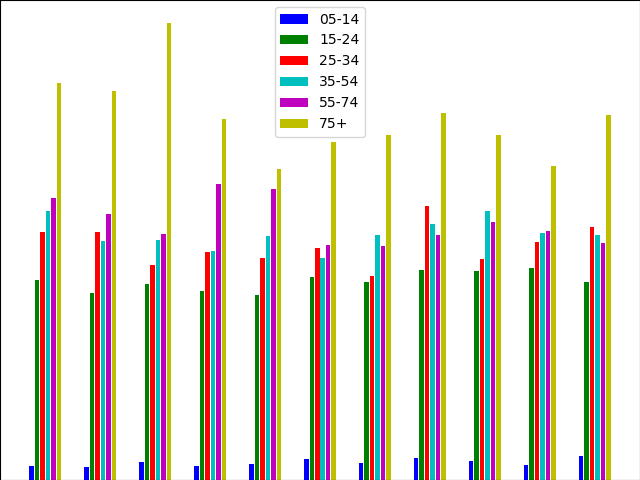

In [22]:
# list data for chart
data = [[0.55, 0.50, 0.67, 0.54, 0.63, 0.80, 0.65, 0.83, 0.71, 0.58, 0.91], 
        [7.65, 7.16, 7.50, 7.21, 7.08, 7.77, 7.57, 8.02, 7.97, 8.12, 7.55],
        [9.47,  9.46, 8.21, 8.73, 8.48, 8.85, 7.81, 10.47, 8.45, 9.10, 9.66],
       [10.27,  9.13, 9.18, 8.77, 9.33, 8.49, 9.38, 9.79, 10.28, 9.44, 9.37],
       [10.77, 10.15, 9.41, 11.33, 11.12, 8.99, 8.94, 9.38, 9.86, 9.50, 9.07],
       [15.17, 14.85, 17.47, 13.81, 11.87, 12.90, 13.20, 14.03, 13.19, 12.01, 13.95]]

# create labels and define axis
year_labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010"]
year = len(year_labels)
X = np.arange(year)

# set margins
margin = 0.05
width_set = (1.-2.*margin)/year

# create figure
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = "b", width = (1.-2.*margin)/year) 
ax.bar(X + 0.10, data[1], color = 'g', width = (1.-2.*margin)/year)
ax.bar(X + 0.20, data[2], color = 'r', width = (1.-2.*margin)/year)
ax.bar(X + 0.30, data[3], color = 'c', width = (1.-2.*margin)/year)
ax.bar(X + 0.40, data[4], color = 'm', width = (1.-2.*margin)/year)
ax.bar(X + 0.50, data[5], color = 'y', width = (1.-2.*margin)/year)

# format x axis
ax.set_xticks(X+0.5)
ax.set_xticklabels(year_labels)

# create legend
ax.legend(labels=['05-14', '15-24', '25-34', '35-54', '55-74', '75+'])

# show figure
plt.show()

In [23]:
# group by sex and year / find gdp and suicide rate mean
sex_gdp = target_countries_df.groupby(['Sex', 'Year'])['GDP(Year)'].mean()
sex_suicide = target_countries_df.groupby(['Sex', 'Year'])['Suicides/100k pop'].mean()

# create summary table
sex_summary_df = pd.DataFrame({'GDP Mean': sex_gdp, 'Suicide Rate Mean': sex_suicide})

# format numbers
sex_summary_df['GDP Mean'] = sex_summary_df['GDP Mean'].map('${:,.2f}'.format)
sex_summary_df['Suicide Rate Mean'] = sex_summary_df['Suicide Rate Mean'].map('{:,.2f}'.format)

# reset index
sex_summary_reset_df = sex_summary_df.reset_index()

# display chart
sex_summary_reset_df

,Sex,Year,GDP Mean,Suicide Rate Mean
0,female,2000,"$523,374,607,282.52",3.12
1,female,2001,"$513,809,673,988.31",2.75
2,female,2002,"$520,495,832,680.35",3.45
3,female,2003,"$548,243,561,816.38",2.96
4,female,2004,"$593,083,518,206.50",2.70
5,female,2005,"$646,919,427,125.58",2.76
6,female,2006,"$698,477,655,388.73",2.62
7,female,2007,"$810,007,720,653.08",3.16
8,female,2008,"$811,550,167,667.20",3.03
9,female,2009,"$751,250,437,554.73",2.76


In [26]:
# print info for chart
summary_women = sex_summary_reset_df.loc[(sex_summary_reset_df['Sex'] == 'female')]
summary_men = sex_summary_reset_df.loc[(sex_summary_reset_df['Sex'] == 'male')]

print(summary_women["Suicide Rate Mean"])
print(summary_men["Suicide Rate Mean"])

0     3.12
1     2.75
2     3.45
3     2.96
4     2.70
5     2.76
6     2.62
7     3.16
8     3.03
9     2.76
10    3.28
Name: Suicide Rate Mean, dtype: object
11    14.84
12    14.33
13    14.03
14    13.83
15    13.47
16    13.17
17    13.22
18    14.35
19    13.79
20    13.49
21    13.55
Name: Suicide Rate Mean, dtype: object


<IPython.core.display.Javascript object>


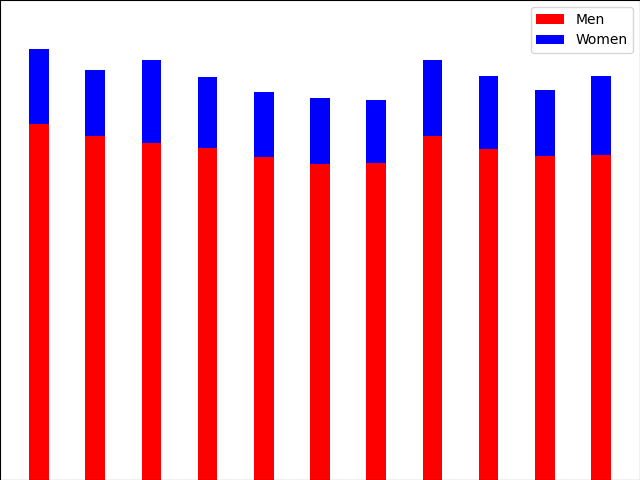

In [28]:
# set chart data
summary_men = [14.84, 14.33, 14.03, 13.83, 13.47, 13.17, 13.22, 14.35, 13.79, 13.49, 13.55]
summary_women = [3.12, 2.75, 3.45, 2.96, 2.70, 2.76, 2.62, 3.16, 3.03, 2.76, 3.28]

# set x axis data
year_labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010"]
year = len(year_labels)
ind = np.arange(year)

#set width
width = 0.35

#create figure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, summary_men, width, color='r')
ax.bar(ind, summary_women, width,bottom=summary_men, color='b')

# create labels and legend
ax.set_ylabel('Suicide Rate')
ax.set_xlabel("Years")
ax.set_title('Gendered Suicide Rate 2000-2010')
ax.set_yticks(np.arange(0, 21, 1))
ax.set_xticks(ind)
ax.set_xticklabels(year_labels)
ax.legend(labels=['Men', 'Women'])

# display chart
plt.show()


<IPython.core.display.Javascript object>


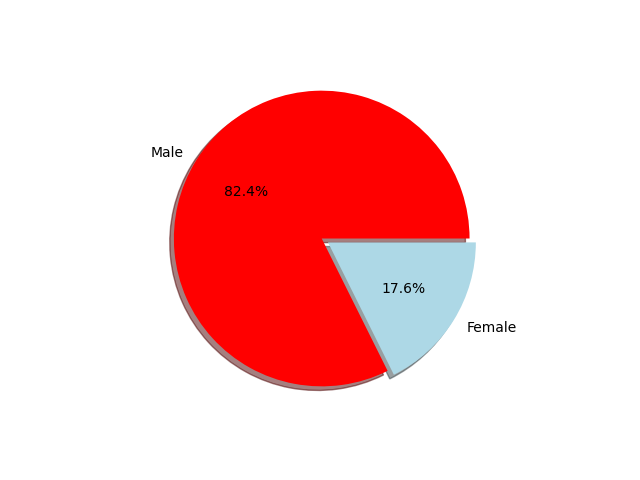

<ipython-input-32-26d1aac69b36>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pie = fig.add_axes([0,0,1,1])


In [32]:
#create piechart showing percentage of which gender has highest suicide rates
fig2 = plt.figure()
pie = fig.add_axes([0,0,1,1])

sizes= [152.07, 32.59]

plt.pie(sizes, explode = (0.05, 0), labels= ["Male", "Female"], colors = ["red", "lightblue"], autopct="%1.1f%%", shadow=True)

# display chart
plt.show()



In [33]:
# country v.  Overall suicide rate
df_Country_Overall_suicide_rate = target_countries_df.groupby('Country')['Suicides/100k pop'].mean()


# define 'Overall suicide rate'
mean_sui2 = df_Country_Overall_suicide_rate.mean()
 
Deviation = df_Country_Overall_suicide_rate - mean_sui2
country_mean_df = pd.DataFrame({"Country Mean":df_Country_Overall_suicide_rate, "Global Mean":mean_sui2, "Deviation":Deviation})

# display chart
country_mean_df

,Country Mean,Global Mean,Deviation
Country,,,
Antigua and Barbuda,1.094000,8.252513,-7.158513
Argentina,10.629848,8.252513,2.377336
Bahamas,1.370455,8.252513,-6.882058
Barbados,1.062576,8.252513,-7.189937
Belize,7.019773,8.252513,-1.232740
Brazil,5.911136,8.252513,-2.341377
Canada,11.073788,8.252513,2.821275
Chile,12.982879,8.252513,4.730366
Colombia,6.563030,8.252513,-1.689483
